# **Heart Disease Prediction Using Machine Learning**

## **1. Importing the Libraries**

In [1]:
import pandas as pd
import pickle

## **2. Importing the Dataset**

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.size

14350

# 3. Taking Care of Missing Values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## **4. Taking Care of Duplicate Values**

In [6]:
data_dup = data.duplicated().any()
data_dup

True

In [7]:
data = data.drop_duplicates()

#data.drop_duplicates() it deletes the dupliocated values

In [8]:
data_dup = data.duplicated().any()

In [9]:
data_dup

False

# 5. Data Processing

In [15]:
#seprating columns of catergories and numerical because we have to handle them sepratly 

In [10]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [18]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## **6. Encoding Categorical Data**

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [22]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [13]:
cate_val.remove('sex')

In [24]:
cate_val.remove('target')

In [14]:
# we are creating dumy variable of 0 1 2 3 for machine purspose using methoud get_dumies

In [27]:
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## **7. Feature Scaling**

In [29]:
data.head()


,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [31]:
# as yoiu can see values in  the columns are not in the same scale so that why we required feature scalling which allows us to put your feature in same scale
# It is important beacuse it help us to calculate the distance between data if data is not properly sorted then feature with higher scale  it starts dominating while calculating

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
st = StandardScaler()

In [27]:
data[cont_val] = st.fit_transform(data[cont_val])

In [38]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## **8. Splitting The Dataset Into The Training Set And Test Set**

In [28]:
x = data.drop('target',axis=1)

In [29]:
y = data['target']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

## **9. Logistic Regression**

In [33]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [ ]:
# we are using different classification algorithm  based on accuracy strat with logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log = LogisticRegression()

In [36]:
log.fit(x_train,y_train)

LogisticRegression()

In [54]:
#now we are fidding your model

In [37]:
y_pred1 = log.predict(x_test)

In [55]:
#now we are checking the accuracy

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

## **10. SVC**

In [40]:
from sklearn import svm

In [ ]:
# support vector classsifier || Support vector machine 

In [41]:
svm = svm.SVC()

In [42]:
svm.fit(x_train,y_train)

SVC()

In [44]:
y_pred2 = svm.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred2)

0.8360655737704918

## **11. KNeighbors Classifier**

In [46]:
# k nearest neighbour classifier 

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred3 = knn.predict(x_test)

In [1]:
accuracy_score(y_test,y_pred3)

NameError: name 'accuracy_score' is not defined

In [52]:
score = []
from sklearn.neighbors import KNeighborsClassifier

for k in range(1,40) :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [53]:
score

[0.6885245901639344,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.819672131147541,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393]

In [54]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
score.append(accuracy_score(y_test,y_pred))

In [55]:
score

[0.6885245901639344,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.819672131147541,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7704918032786885]

## **Non-Linear ML Algorithms**

In [56]:
#for using non-liner ML algorithm -- Prepocessing is not required here we dont require endcoing and feature scalling

In [57]:
data = pd.read_csv('heart.csv')

In [58]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [59]:
data = data.drop_duplicates()

In [60]:
data.shape

(302, 14)

In [61]:
x = data.drop('target',axis=1)
y = data['target']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## **12. Decision Tree Classifie**

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt = DecisionTreeClassifier()

In [65]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred4 = dt.predict(x_test)

In [67]:
accuracy_score(y_test,y_pred4)

0.7213114754098361

## **1313. Random Forest Classifier**

In [68]:
from sklearn.ensemble import RandomForestClassifier 

In [69]:
rf =  RandomForestClassifier()

In [70]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
y_pred5 = rf.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

## **14. Gradient Boosting Classifier**

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gbc = GradientBoostingClassifier()

In [75]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [76]:
y_pred6 = gbc.predict(x_test)

In [77]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [78]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                         'ACC': [accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})

In [79]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.836066
2,KNN,0.737705
3,DT,0.721311
4,RF,0.836066
5,GB,0.803279


In [80]:
# now we are visualtiing the data

In [81]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

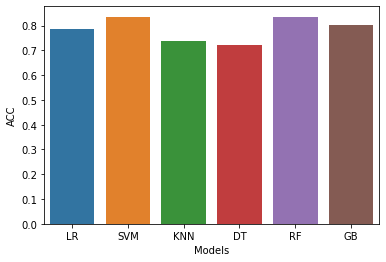

In [82]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [83]:
# so from the given graph accuracy of random forst classifier is high so we should test your enteire data into the model for best accuracy 

In [84]:
x = data.drop('target',axis=1)
y = data['target']

In [85]:
x.shape


(302, 13)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier()

In [88]:
rf.fit(x,y)

RandomForestClassifier()

## **15. Prediction on New Data**

In [89]:
    import pandas as pd
    import pickle

In [90]:
new_data = pd.DataFrame({
    'age' : 20,
    'sex' : 0,
    'cp' : 0,
    'trestbps' : 125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [91]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,20,0,0,125,212,0,1,168,0,1.0,2,2,3


In [92]:
p = rf.predict(new_data)
if p[0] ==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [95]:
filename = 'disease_model'
pickle.dump(rf,open(filename,'wb'))

In [96]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

## **16. Save Model Usign Joblib**

In [124]:
import joblib

In [125]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [126]:
model = joblib.load('model_joblib_heart')

In [127]:
model.predict(new_data)

array([0], dtype=int64)

## **17. Creating GUI**